In [3]:
import numpy as np
import pandas as pd

Прочитайте csv файл (використовуйте функцію read_csv)
Виведіть перші п'ять рядків (використовується функція head)
Виведіть розміри датасету (використовуйте атрибут shape)

П: Про скільки книг зберігає дані датасет?
В: Датасет зберігає дані про 550 книжок

In [4]:
book_data = pd.read_csv('bestsellers with categories.csv')
book_data.head()
book_data.shape

(550, 7)

Для спрощення подальшої роботи давайте трохи підправимо назви змінних. Як бачите, тут усі назви починаються з великої літери, а одна - навіть містить пробіл. Це дуже небажано і може бути досить незручним. Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style). А заразом і вивчимо корисний атрибут датафрейму: columns (можна просто присвоїти список нових імен цьому атрибуту)

In [5]:
book_data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
book_data.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

П: Чи є в якихось змінних пропуски?
В: Ні, в змінних пропусків немає

In [6]:
book_data.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

П: Які є унікальні жанри
В: Є такі унікальні жанри - 'Non Fiction' та 'Fiction'

In [7]:
book_data.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

In [8]:
import matplotlib.pyplot as plt

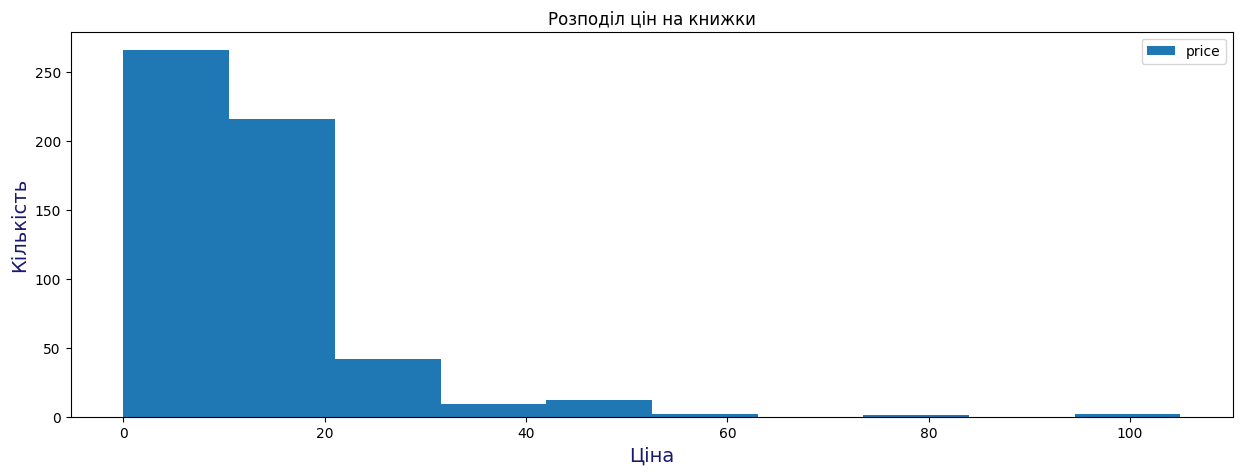

In [9]:
book_data['price'].plot(kind='hist',
                        figsize = [15, 5],
                        title = 'Розподіл цін на книжки',
                        legend = True)
plt.xlabel('Ціна', fontsize=14, color='midnightblue')
plt.ylabel('Кількість', fontsize=14, color='midnightblue')
plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

П: Максимальна ціна?
В: 105
П: Мінімальна ціна?
В: 0
П: Середня ціна?
В:13,1
П: Медіанна ціна?
В: 11

In [10]:
display(book_data['price'].describe())

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64

П: Який рейтинг у датасеті найвищий? Відповідь: 4.9

In [11]:
book_data.user_rating.max()

4.9

Скільки книг мають такий рейтинг? Відповідь: 52

In [12]:
book_data[book_data['user_rating'] == book_data.user_rating.max()].shape

(52, 7)

Яка книга має найбільше відгуків? Відповідь: 87841

In [13]:
book_data.reviews.max()

87841

П: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?
Відповідь: 46

In [14]:
top_book = book_data[book_data['year'] == 2015].sort_values(by=['user_rating'], ascending=False)[0:51]
top_book.price.max()

46

П: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

In [15]:
len(book_data[(book_data['genre'] == 'Fiction') & (book_data['year'] == 2010)])


20

П: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 50

In [16]:
len(book_data[(book_data['user_rating'] == 4.9) & (book_data['year'] == 2010) | (book_data['year'] == 2011)])

50

І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

П: Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)

In [17]:
less_book = book_data[(book_data['year'] == 2015) & (book_data['price'] < 8)].sort_values(by=['price'], ascending=True)
less_book.tail(1)

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

П: Максимальна ціна для жанру Fiction: Відповідь 82

П: Мінімальна ціна для жанру Fiction: Відповідь 0

П: Максимальна ціна для жанру Non Fiction: Відповідь 105

П: Мінімальна ціна для жанру Non Fiction: Відповідь 0

In [18]:
genre_data = book_data.groupby(['genre']).agg({"price": ['min', 'max']})
display(genre_data)

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

П: Якої розмірності вийшла таблиця? Відповідь: (248, 1)

In [19]:
author_books_data = book_data.groupby(['author']).agg({"name": 'count'})
author_books_data.shape

(248, 1)

П: Який автор має найбільше книг? Відповідь: Jeff Kinney

П: Скільки книг цього автора? Відповідь: 12

In [20]:
author_books_data.sort_values(by='name', ascending=False).head(1)

,name
author,
Jeff Kinney,12


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

П: У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt

П: Який у цього автора середній рейтинг? Відповідь: 3.9

In [21]:
author_rate_data = round(book_data.groupby(['author']).agg({"user_rating": 'mean'}), 1).sort_values(by='user_rating', ascending=True)
display(author_rate_data)

,user_rating
author,
Donna Tartt,3.9
Gillian Flynn,4.0
Muriel Barbery,4.0
Gallup,4.0
Ian K. Smith M.D.,4.1
...,...
Dr. Seuss,4.9
Emily Winfield Martin,4.9
Eric Carle,4.9


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

П: Який автор перший у списку?
В: Muriel Barbery

In [22]:
author_data = pd.concat([author_books_data, author_rate_data], axis=1)
display(author_data)

,name,user_rating
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7
...,...,...
Walter Isaacson,3,4.6
William Davis,2,4.4
William P. Young,2,4.6


In [23]:
author_data.sort_values(by = ['name', 'user_rating'], ascending=True)

,name,user_rating
author,,
Muriel Barbery,1,4.0
Chris Cleave,1,4.1
Ian K. Smith M.D.,1,4.1
Pierre Dukan,1,4.1
Elizabeth Strout,1,4.2
...,...,...
American Psychological Association,10,4.5
Gary Chapman,11,4.7
Suzanne Collins,11,4.7


# Додаткова візуалізація

In [24]:
import plotly.express as px

In [30]:
avg_data = book_data.groupby('user_rating').agg({'reviews': 'mean'})
fig = px.line(avg_data, x=avg_data.index, y="reviews", title = "Середня кількість відгуків залежно від рейтингу")
fig.show()

In [52]:
import seaborn as sns
from numpy import median

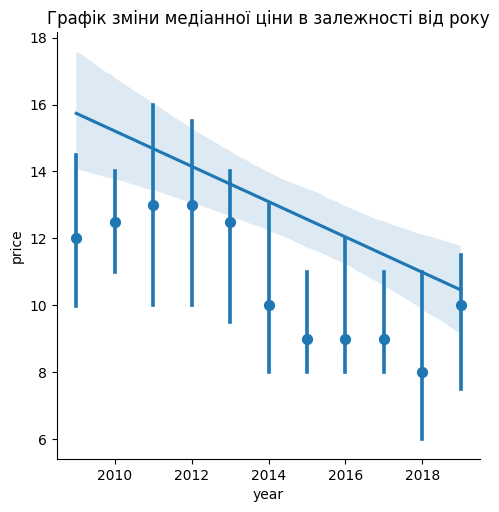

In [54]:
sns.lmplot(data=book_data.sort_values(by='user_rating', ascending=True),
             x="year",
             y="price",
           x_estimator=median)
plt.title('Графік зміни медіанної ціни в залежності від року')
plt.show()

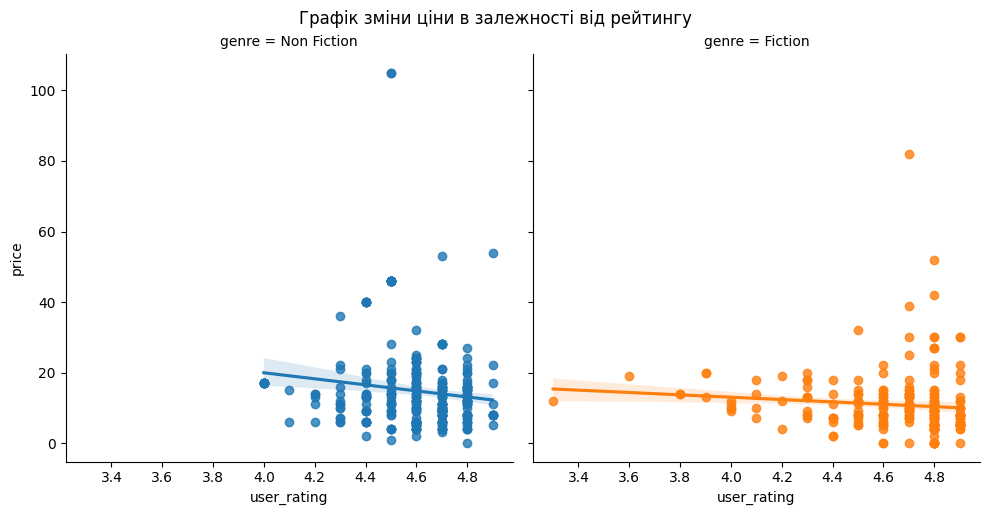

In [59]:
sns.lmplot(x="user_rating", y="price", hue="genre", col="genre", data=book_data).fig.suptitle("Графік зміни ціни в залежності від рейтингу", y=1.02)
plt.show()

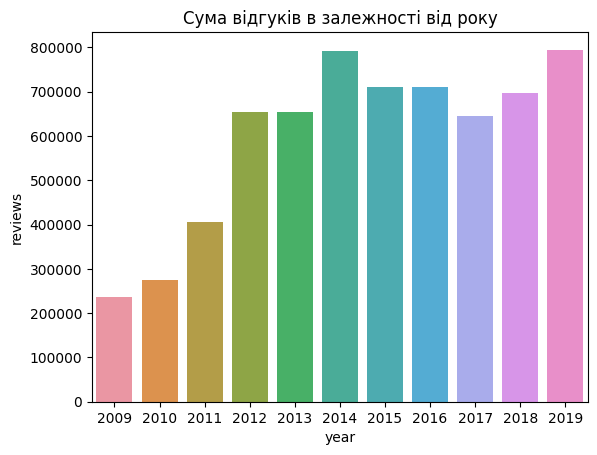

In [63]:
year_data = book_data.groupby('year').agg({'reviews': 'sum'})
sns.barplot(data=year_data, y='reviews', x=year_data.index)
plt.title('Сума відгуків в залежності від року')
plt.show()